In [1]:
import numpy as np
import pandas as pd 
from keras import initializers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
import xlsxwriter
from keras.models import load_model

Total Data : 3000
Bukan Dewasa : 1500
Dewasa : 1500


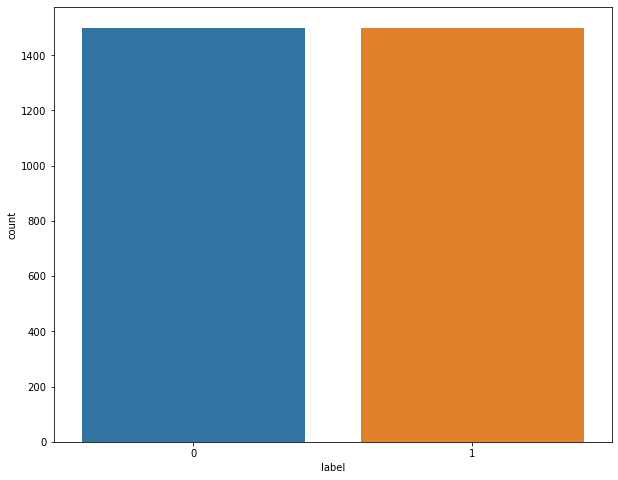

In [2]:
data = pd.read_excel("data/clean/cleansampel.xlsx")
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)

dewasa = data.loc[data['label'] == 1, 'tweet'].copy().reset_index(drop=True)
bukan = data.loc[data['label'] == 0, 'tweet'].copy().reset_index(drop=True)
print("Total Data :", len(data))
print("Bukan Dewasa :", len(bukan))
print("Dewasa :", len(dewasa))

plt.figure(figsize=(10,8))
sns.countplot(x='label', data=data)
plt.show()

In [8]:
def get_model(X, Y):
    model = Sequential() 
    model.add(Embedding(input_dim = vocab, output_dim = 128, input_length = maxlen, embeddings_initializer = initializer))
    model.add(Dropout(0.9))
    model.add(LSTM(128, recurrent_initializer = initializer, kernel_initializer = initializer))
    model.add(Dropout(0.4))
    model.add(Dense(2, activation='sigmoid', kernel_initializer = initializer)) 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    
    return model

def evaluation(model, X, Y):
    Y_pred = model.predict(X)
    Y_pred_class = np.argmax(Y_pred, axis=1)
    Y_act = Y
    
    acc = accuracy_score(Y_act, Y_pred_class)
    
    return acc

In [9]:
text = data['tweet'].values
label = data['label'].values

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)

vocab = max([len(tokenizer.word_index)]) + 1 # kamus kata 
maxlen = max([len(i.split()) for i in text]) # panjang kalimat
batch_size = 32 # penentuan jumlah sampel yang ditraining pada tiap epoch
num_epochs = 50 # banyak iterasi pada saat training model 
initializer = initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=2) # mengatur angka random weigth

In [15]:
print(initializer)

In [11]:
#Data Train
X = tokenizer.texts_to_sequences(text)
X = pad_sequences(X, maxlen=maxlen)
Y = to_categorical(label, num_classes = 2)

In [12]:
model = get_model(X, Y)

NotImplementedError: Cannot convert a symbolic Tensor (lstm/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [13]:
# training model
model.fit(X, Y, batch_size=batch_size, epochs=num_epochs, verbose=1)

Epoch 1/50


ValueError: in user code:

    C:\Users\PREDATOR\anaconda3\envs\RaihanEnv\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\PREDATOR\anaconda3\envs\RaihanEnv\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\PREDATOR\anaconda3\envs\RaihanEnv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\PREDATOR\anaconda3\envs\RaihanEnv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\PREDATOR\anaconda3\envs\RaihanEnv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\PREDATOR\anaconda3\envs\RaihanEnv\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\PREDATOR\anaconda3\envs\RaihanEnv\lib\site-packages\tensorflow\python\keras\engine\training.py:796 train_step
        loss = self.compiled_loss(
    C:\Users\PREDATOR\anaconda3\envs\RaihanEnv\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\PREDATOR\anaconda3\envs\RaihanEnv\lib\site-packages\tensorflow\python\keras\losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\PREDATOR\anaconda3\envs\RaihanEnv\lib\site-packages\tensorflow\python\keras\losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\PREDATOR\anaconda3\envs\RaihanEnv\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\PREDATOR\anaconda3\envs\RaihanEnv\lib\site-packages\tensorflow\python\keras\losses.py:1754 binary_crossentropy
        backend.binary_crossentropy(
    C:\Users\PREDATOR\anaconda3\envs\RaihanEnv\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\PREDATOR\anaconda3\envs\RaihanEnv\lib\site-packages\tensorflow\python\keras\backend.py:5023 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    C:\Users\PREDATOR\anaconda3\envs\RaihanEnv\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\PREDATOR\anaconda3\envs\RaihanEnv\lib\site-packages\tensorflow\python\ops\nn_impl.py:132 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, 49, 2) vs (None, 2))


In [ ]:
acc = evaluation(model, X, label)
print("Accuracy: %.2f" % (acc*100), "%")

Accuracy: 100.00 %


In [ ]:
model.save('model/pseudo_labeling.h5')

# Labeling Data

In [8]:
unlabeled = pd.read_excel("data/clean/cleandata.xlsx")
unlabeled.replace('', np.nan, inplace=True)
unlabeled.dropna(inplace=True)

In [9]:
un_text = unlabeled['tweet'].values

In [10]:
text1 = tokenizer.texts_to_sequences(un_text)
text1 = pad_sequences(text1, maxlen=maxlen)

In [11]:
pred_label = model.predict(text1)
label1 = np.argmax(pred_label, axis = 1) 

NameError: name 'model' is not defined

In [ ]:
workbook = xlsxwriter.Workbook('data/label/label_pseudo')
worksheet = workbook.add_worksheet()

row = 0
col = 0

rowHeaders = ['tweet', 'label']
worksheet.write_row(row, col,  tuple(rowHeaders))


for i in un_text:
    tweet = i
    rowValues = [tweet]
    row += 1
    worksheet.write_row(row, col, tuple(rowValues))

row = 0
for l in label1:
    label = l
    rowValues = [label]
    row += 1 
    worksheet.write_row(row, col + 1, tuple(rowValues))

workbook.close()

# Retrained Model

In [12]:
excel_names = ["data/clean/cleansampel.xlsx", "data/label/label_pseudo.xlsx"]
excels = [pd.ExcelFile(name) for name in excel_names]

# ubah ke data frame 
# hapus header pertama, yang merupakan judul kolom
frames = [x.parse(x.sheet_names[0], header=None,index_col=None) for x in excels]
frames[1:] = [df[1:] for df in frames[1:]]

# menggabungkan dataframe
combined = pd.concat(frames)

# tulis/save ke file baru 
combined.to_excel("data/label/combineSSL1.xlsx", header=False, index=False)

In [13]:
data = pd.read_excel("data/label/combineSSL1.xlsx")
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)

Total Data : 54338
Bukan Dewasa : 27192
Dewasa : 27146


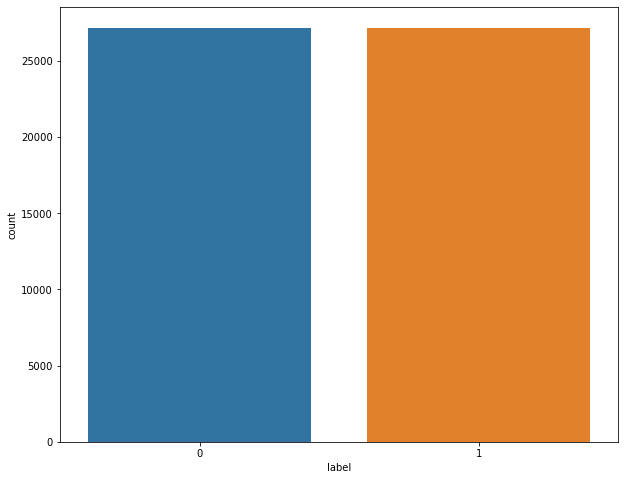

In [14]:
dewasa = data.loc[data['label'] == 1, 'tweet'].copy().reset_index(drop=True)
bukan = data.loc[data['label'] == 0, 'tweet'].copy().reset_index(drop=True)
print("Total Data :", len(data))
print("Bukan Dewasa :", len(bukan))
print("Dewasa :", len(dewasa))

plt.figure(figsize=(10,8))
sns.countplot(x='label', data=data)
plt.show()

In [ ]:
text2 = data['tweet'].values
label2 = data['label'].values

In [ ]:
data_train, data_test, label_train, label_test = train_test_split(text2, label2, test_size = 0.33, random_state = 42)
data_train, data_val, label_train, label_val = train_test_split(data_train, label_train, test_size = 0.33, random_state = 42)

In [ ]:
X_train = tokenizer.texts_to_sequences(data_train)
X_train = pad_sequences(X_train, maxlen=maxlen)
Y_train = to_categorical(label_train, num_classes = 2)

X_test = tokenizer.texts_to_sequences(data_test)
X_test = pad_sequences(X_test, maxlen=maxlen)
Y_test = to_categorical(label_test, num_classes = 2)

X_val = tokenizer.texts_to_sequences(data_val)
X_val = pad_sequences(X_val, maxlen=maxlen)
Y_val = to_categorical(label_val, num_classes = 2)

In [ ]:
# training model
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(X_val, Y_val))

Train on 24392 samples, validate on 12014 samples
Epoch 1/50
24392/24392 [==============================] - 96s 4ms/step - loss: 0.2154 - acc: 0.9203 - val_loss: 0.1328 - val_acc: 0.9547
Epoch 2/50
24392/24392 [==============================] - 94s 4ms/step - loss: 0.1385 - acc: 0.9509 - val_loss: 0.1222 - val_acc: 0.9569
Epoch 3/50
24392/24392 [==============================] - 94s 4ms/step - loss: 0.1224 - acc: 0.9559 - val_loss: 0.1188 - val_acc: 0.9570
Epoch 4/50
24392/24392 [==============================] - 95s 4ms/step - loss: 0.1132 - acc: 0.9587 - val_loss: 0.1173 - val_acc: 0.9573
Epoch 5/50
24392/24392 [==============================] - 94s 4ms/step - loss: 0.1067 - acc: 0.9610 - val_loss: 0.1133 - val_acc: 0.9567
Epoch 6/50
24392/24392 [==============================] - 94s 4ms/step - loss: 0.1007 - acc: 0.9617 - val_loss: 0.1133 - val_acc: 0.9580
Epoch 7/50
24392/24392 [==============================] - 94s 4ms/step - loss: 0.0942 - acc: 0.9626 - val_loss: 0.1144 - val_acc

In [ ]:
acc_train = evaluation(model, X_train, label_train)
print("Train Accuracy: %.2f" % (acc_train*100), "%")

Train Accuracy: 98.75 %


In [ ]:
acc_test = evaluation(model, X_test, label_test)
print("Test Accuracy: %.2f" % (acc_test*100), "%")

Test Accuracy: 96.28 %


In [ ]:
model.save('model/pseudo_validation.h5')